# SNR su low-pass a diverse frequenze del lock-in

[FOGLIO DI LAVORO EXCEL](https://unimibit-my.sharepoint.com/personal/g_fracasso2_campus_unimib_it/_layouts/15/guestaccess.aspx?share=Eb67kDSYpslCpRUZ2Tgg-tYBs5W_hCoCteq2ypSsnMiRcw&e=RWR5ri) 

---

#### Riporto commento dal foglio Excel

Cambio blades a 1 kHz

---

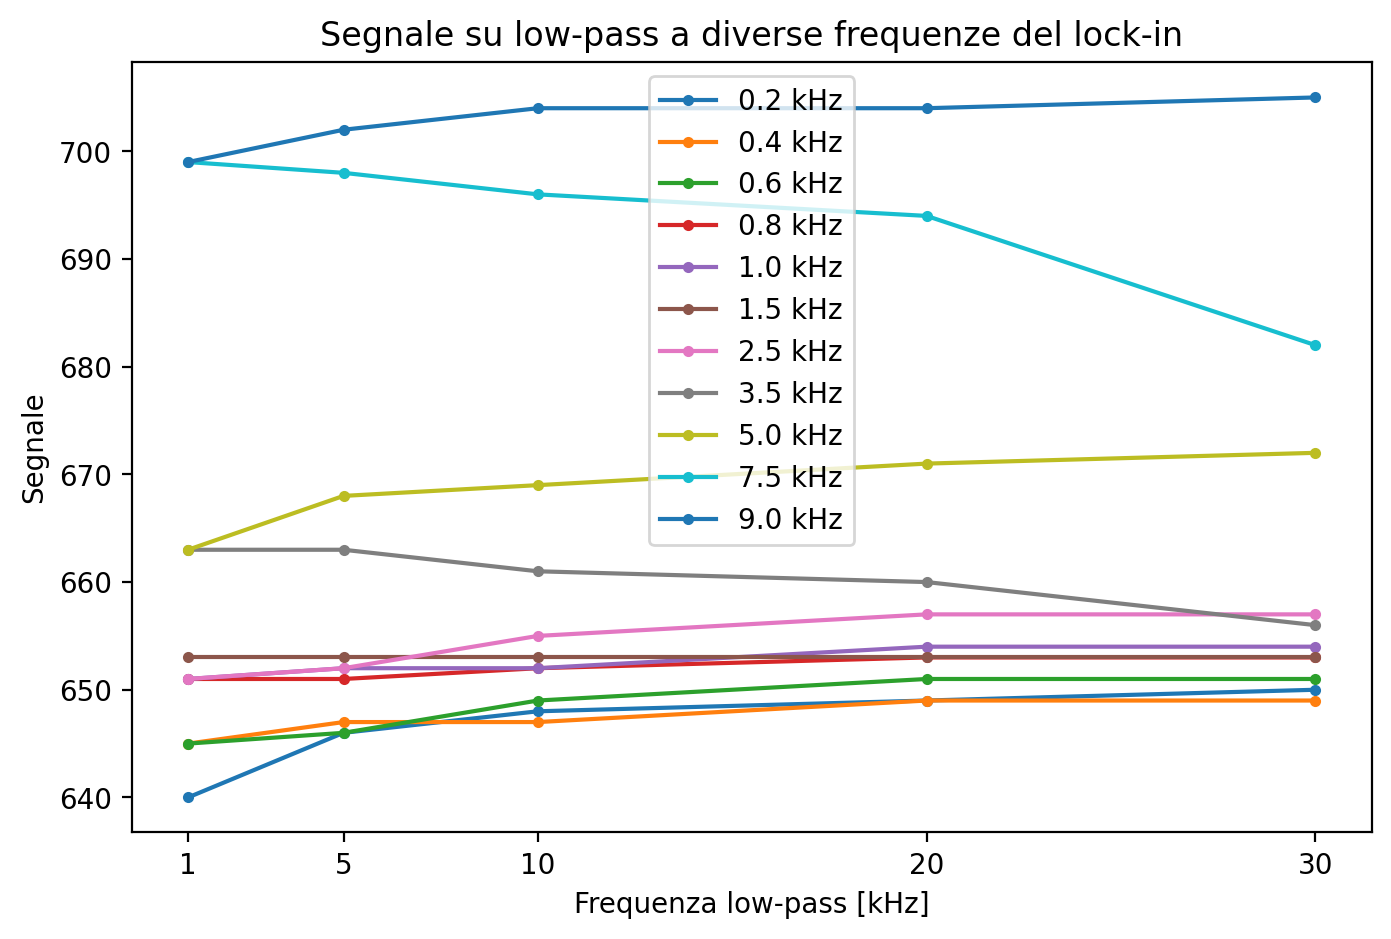

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Legge il file ignorando la prima riga (intestazione)
dati = np.loadtxt("data/segnale_lock_in.csv", skiprows=1)
num_colonne = dati.shape[1]

# le successive colonne sono i valori SNR a frequenza chopper fissa
y = [dati[:,i] for i in range(1, num_colonne)] # dalla seconda all'ultima: SNR 
# le frequenze del chopper vengono messe ad etichetta
low_pass = [1, 5, 10, 20, 30]
x = low_pass # Prima colonna: frequenza low-pass filter
intestazione = np.loadtxt("data/segnale_lock_in.csv", max_rows=1) 
lock_in = [200, 400, 600, 800, 1000, 1500, 2500, 3500, 5000, 7500, 9000]
lock_in = np.array(lock_in) / 1000

N_lock_in  = len(lock_in)
N_low_pass = len(low_pass)

# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(N_lock_in):
    plt.plot(x, y[i], marker='o', label=f"{lock_in[i]} kHz", linestyle='-', markersize=3)
plt.xlabel("Frequenza low-pass [kHz]")
plt.xticks(x, low_pass)
plt.ylabel("Segnale")
plt.title("Segnale su low-pass a diverse frequenze del lock-in")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

A 10 Hz di low pass stiamo tagliando la maggior parte del rumore, senza tagliare troppo segnale. 

- sotto tagli troppo segnale
- sopra tagli poco rumore

# SNR su frequenze del lock-in a diverse freq. low-pass 

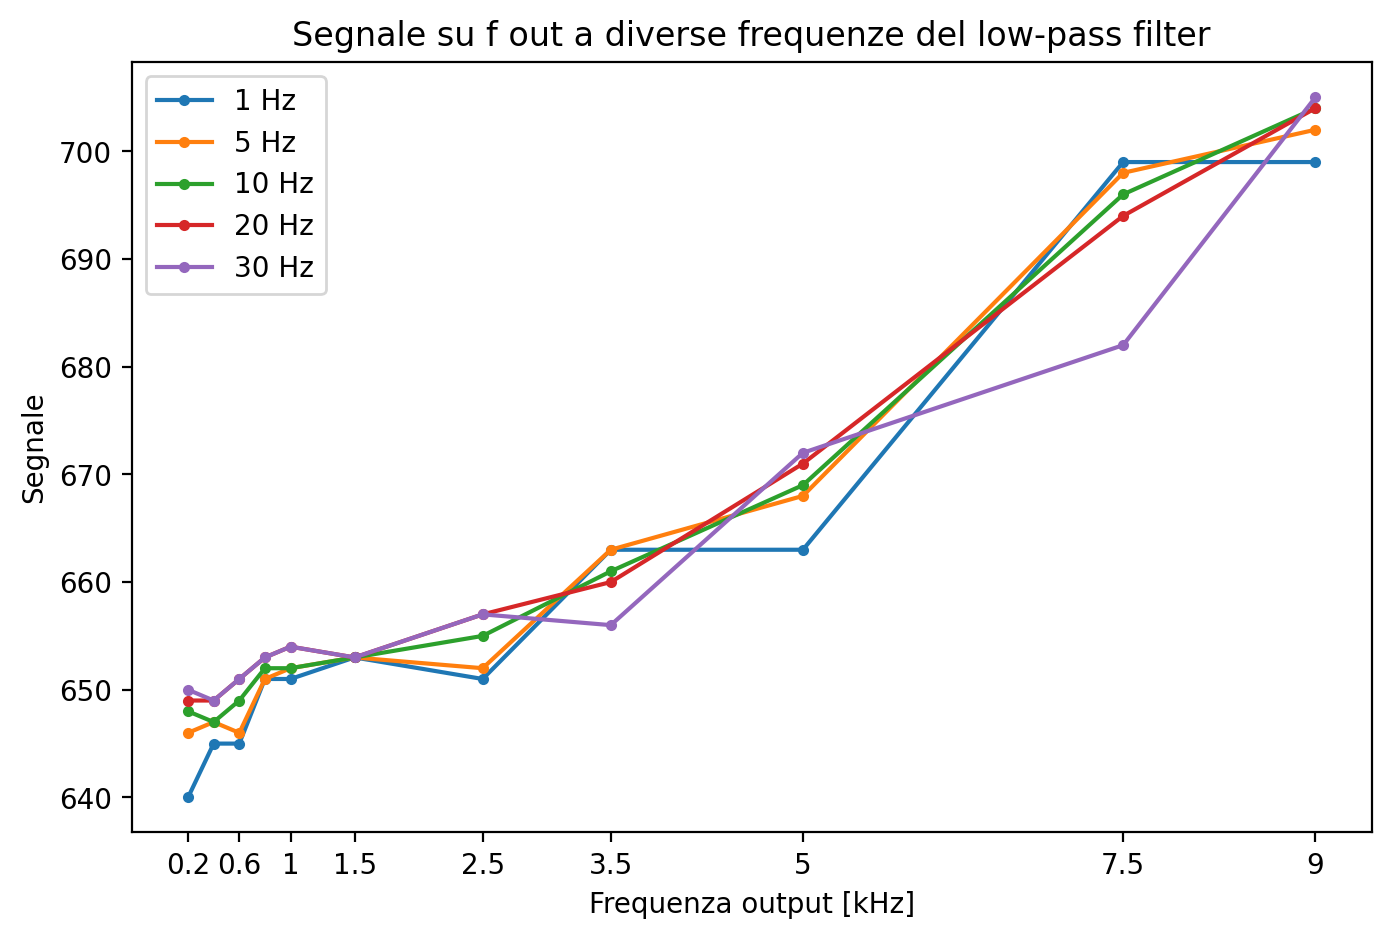

In [5]:
x2 = np.array(lock_in)
y2 = []
for j in range(N_low_pass):
    help = []
    for i in range(N_lock_in):
        help.append(y[i][j])
    y2.append(help)


x2_ticks = [0.2, 0.6, 1, 1.5, 2.5, 3.5, 5, 7.5, 9]


# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(N_low_pass):
    plt.plot(x2, y2[i], marker='o', label=f"{low_pass[i]} Hz", linestyle='-', markersize=3)
plt.xlabel("Frequenza output [kHz]")
#plt.xscale('log')
plt.xticks(x2_ticks, x2_ticks)
plt.ylabel("Segnale")
plt.title("Segnale su f out a diverse frequenze del low-pass filter")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

25 marzo
L'obiettivo ora è misurare più frequenze di output, mantenendo il low-pass attorno all'ottimo che abbiamo osservato (10 Hz). In questo modo possiamo estrapolare il **tempo di rilassamento** del sistema.

Tempo di rilassamento: il chopper è come se mettesse il segnale su On/OFF periodicamente. QUando il segnale va OFF il sistema rilassa, quando torna ON viene nuovamente eccitato. Se torna ON troppo in fretta il sistema non fa in tempo a rilassarsi e quindi non c'è niente da eccitare, risultato: il segnale diminuisce.

In [6]:
y2

[[np.float64(640.0),
  np.float64(645.0),
  np.float64(645.0),
  np.float64(651.0),
  np.float64(651.0),
  np.float64(653.0),
  np.float64(651.0),
  np.float64(663.0),
  np.float64(663.0),
  np.float64(699.0),
  np.float64(699.0)],
 [np.float64(646.0),
  np.float64(647.0),
  np.float64(646.0),
  np.float64(651.0),
  np.float64(652.0),
  np.float64(653.0),
  np.float64(652.0),
  np.float64(663.0),
  np.float64(668.0),
  np.float64(698.0),
  np.float64(702.0)],
 [np.float64(648.0),
  np.float64(647.0),
  np.float64(649.0),
  np.float64(652.0),
  np.float64(652.0),
  np.float64(653.0),
  np.float64(655.0),
  np.float64(661.0),
  np.float64(669.0),
  np.float64(696.0),
  np.float64(704.0)],
 [np.float64(649.0),
  np.float64(649.0),
  np.float64(651.0),
  np.float64(653.0),
  np.float64(654.0),
  np.float64(653.0),
  np.float64(657.0),
  np.float64(660.0),
  np.float64(671.0),
  np.float64(694.0),
  np.float64(704.0)],
 [np.float64(650.0),
  np.float64(649.0),
  np.float64(651.0),
  np.floa

Blades interne: 20Hz-1kHz
Blades esterne: 